In [36]:
#import libraries to use with data (CVS) file
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Pandas datetime

In [105]:
date = pd.to_datetime('today')
date

Timestamp('2018-12-06 00:00:00')

## Numpy datetime

In [106]:
date = np.array('today', dtype=np.datetime64)
date

array(datetime.date(2018, 12, 6), dtype='datetime64[D]')

In [127]:
#load csv file data with headers

data = "datasets\diamonds.csv"
df = pd.read_csv((data),index_col=0)

In [119]:
#show the headers and default data list
df.head(50)

,carat,cut,color,clarity,depth,table,price,x,y,z,mytag
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Prospect
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Prospect
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Prospect
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Prospect
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Prospect
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Prospect
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Prospect
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Prospect
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Prospect
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Prospect


## Check for 'null' values to ensure data is clean

In [109]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
mytag      0
dtype: int64

In [39]:
#show the tail and default data list from the bottom-up
df.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [128]:
df['price'].dtypes
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
#Define bins as 326-1000, 1001-5000, 5001-10000, 10001-15000, 150001-200000
bins = [325, 10000, 15000, 20000]

# Create names for the four groups
cut_tag = ['Prospect', 'Business', 'Elite']

In [42]:
#make new column with Cut Grading Schema
df['mytag'] = pd.cut(df['price'], bins, labels = cut_tag)
df.head()
pd.value_counts(df['mytag']) # number of observations per customer price group

Prospect    48718
Business     3567
Elite        1655
Name: mytag, dtype: int64

In [43]:
#drop a column
#df = df.drop(['Customer_Prize_Tag'], axis =1)


In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,mytag
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Prospect
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Prospect
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Prospect
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Prospect
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Prospect


## Convert the attribute 'cut' to numeric value

In [19]:
## Using the IF ... statement
def cut_to_numeric(x):
    if x=='Ideal':
        return 5
    if x=='Premium':
        return 4
    if x=='Very Good':
        return 3
    if x=='Good':
        return 2
    if x=='Fair':
        return 1

In [20]:
## Compared it with the CASE ... statement
def cut_to_numeric(x):
    switcher = {
        'Ideal': 5,
        'Premium': 4,
        'Very Good': 3,
        'Good': 2,
        'Fair': 1
        }
    return switcher.get(x, 'nil')

### These data attributes were used based on the kaggle.dataset (exploratory data analysis)

In [129]:
## Compared with the MAPPING ...statement
## Convert all STRINGS to NUMERIC values
copydf = df
copydf['cut'] = copydf['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
copydf['color'] = copydf['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3, 'I':2, 'J':1})
copydf['clarity'] = copydf['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4, 'SI1':3, 'SI2':2, 'I1':1})

In [131]:
#copydf['cut_num'] = copydf['cut'].apply(cut_to_numeric)
copydf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [132]:
copydf.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### Drop a few attributes that is has repetitive meaning - Features Selection

In [142]:
copydf = df
featuredf = copydf.drop(['depth', 'y', 'z'], axis=1)
featuredf.head()

,carat,cut,color,clarity,table,price,x
1,0.23,5,6,2,55.0,326,3.95
2,0.21,4,6,3,61.0,326,3.89
3,0.23,2,6,5,65.0,327,4.05
4,0.29,4,2,4,58.0,334,4.20
5,0.31,2,1,2,58.0,335,4.34


In [143]:

meanprice = df['price'].mean()
stdprice = df['price'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf = df #because we don't want to mess up the original df
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

copydf.count()

carat      50300
cut        50300
color      50300
clarity    50300
depth      50300
table      50300
price      50300
x          50300
y          50300
z          50300
dtype: int64

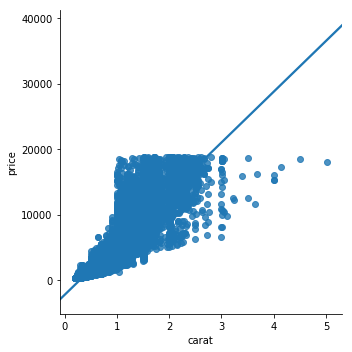

In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set_style('darkgrid') #my default is "whitegrid"
#make a scatterplot
sns.lmplot(x='carat', y='price', data=df)

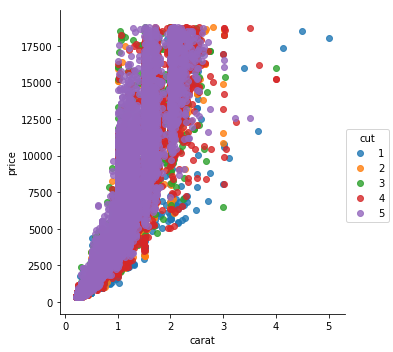

In [145]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price', data=df, 
           fit_reg=False, #remove regression line
           hue='cut')   #color by evolution stage

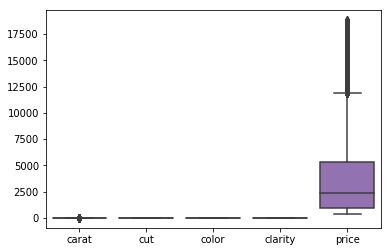

In [146]:
%matplotlib inline
stats_df = df.drop(['table', 'depth', 'x', 'y', 'z'], axis=1)
#stats_df.head()
sns.boxplot(data=stats_df)

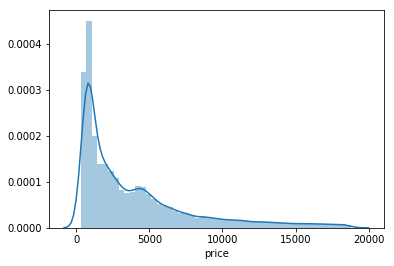

In [147]:
sns.distplot (df['price'])

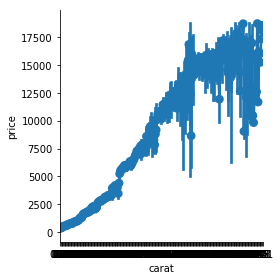

In [148]:
g = sns.factorplot(x='carat', y='price', data=stats_df)
#g.set_xticklables(rotation=-45)

In [74]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


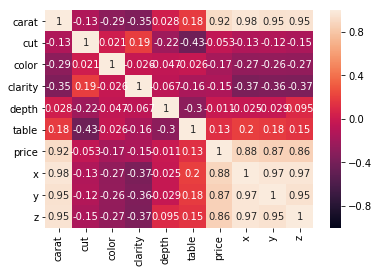

In [149]:
#show correlation of stats via heatmap
stats_corr = df.corr()

sns.heatmap(stats_corr, vmin=-1, annot=True)

## Linear Regression

In [150]:
import statsmodels.formula.api as smf

result = smf.ols('price ~ carat + x -1', data=df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.340e+05
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:37:57   Log-Likelihood:            -4.7213e+05
No. Observations:               53940   AIC:                         9.443e+05
Df Residuals:                   53938   BIC:                         9.443e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9135.7563     20.721    440.884      0.000    9095.142    9176.370
x           -586.9641      3.293   -178.237      0.000    -593.419    -580.509
==============================================================================
Omnibus:                    13950.822   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234073.419
Skew:                           0.804   Prob(JB):                         0.00
Kurtosis:                      13.078   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

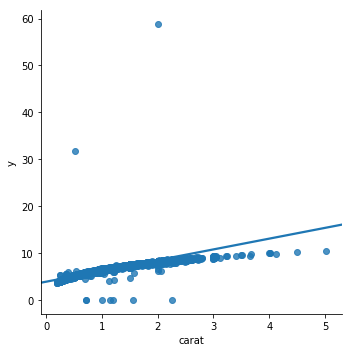

In [151]:
sns.lmplot(x='carat', y= 'y', data=df)

Text(0.5,1,'Total Sample Size for Clarity')

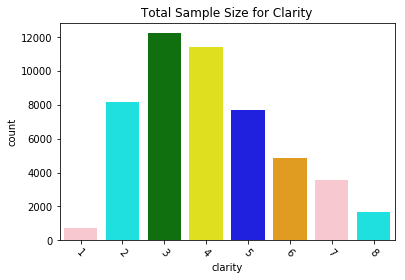

In [152]:
%matplotlib inline
mycolor = ['pink', 'cyan', 'green','yellow', 'blue', 'orange']
sns.countplot(x='clarity', data=copydf, palette = mycolor )
plt.xticks(rotation=-45)
plt.title("Total Sample Size for Clarity") 

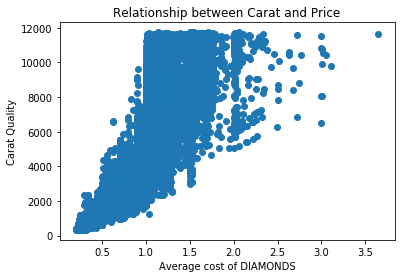

In [108]:
plt.scatter(copydf.carat, copydf.price) 
plt.xlabel("Average cost of DIAMONDS") 
plt.ylabel("Carat Quality") 
plt.title("Relationship between Carat and Price") 
plt.show()

In [95]:
def clarity_to_numeric(x):
    if x=='SI1':
        return 7
    if x=='VS2':
        return 4
    if x=='SI2':
        return 6
    if x=='VS1':
        return 3
    if x=='VVS2':
        return 2
    if x=='VVS1':
        return 1
    if x=='IF':
        return 0
    if x=='I1':
        return 8

In [99]:
copydf['clarity_num'] = df['clarity'].apply(clarity_to_numeric)
copydf.head()
copydf.corr()

,carat,depth,table,price,x,y,z,clarity_num
carat,1.000000,0.046718,0.183476,0.915823,0.980832,0.972904,0.956031,0.333875
depth,0.046718,1.000000,-0.292003,0.004336,-0.015979,-0.019322,0.115509,0.076333
table,0.183476,-0.292003,1.000000,0.128189,0.193113,0.184279,0.144205,0.147435
price,0.915823,0.004336,0.128189,1.000000,0.896130,0.891750,0.869773,0.132784
x,0.980832,-0.015979,0.193113,0.896130,1.000000,0.990701,0.965493,0.346425
y,0.972904,-0.019322,0.184279,0.891750,0.990701,1.000000,0.959408,0.338990
z,0.956031,0.115509,0.144205,0.869773,0.965493,0.959408,1.000000,0.341698
clarity_num,0.333875,0.076333,0.147435,0.132784,0.346425,0.338990,0.341698,1.000000


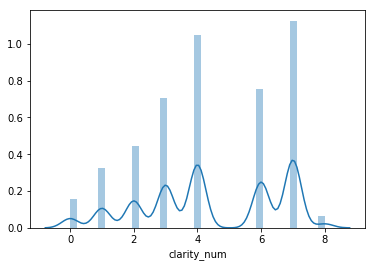

In [97]:
#create a histogram of the distribution of clarity power
sns.distplot(copydf['clarity_num'])

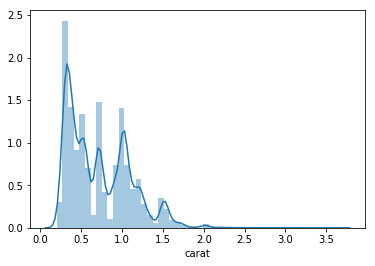

In [98]:
#create a histogram of the distribution of carat
sns.distplot(copydf['carat'])

### Displays the total ROWs and COLUMNs in a Dataset

In [102]:
df.shape

(53940, 11)